# 線形代数学

$$
% 太字のalias
\newcommand{\b}[1]{\boldsymbol{#1}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## ベクトル

$$
\boldsymbol{a} = (a_1, a_2, a_3)
$$

### 内積

$k$次元のベクトル$\boldsymbol{a} = (a_1, a_2, \dots, a_k)^T, \ \boldsymbol{b} = (b_1, b_2, \dots, b_k)^T$があるとき、

$$
\sum^k_{i=1} a_i b_i
$$

という演算を内積（inner product）といい、$\boldsymbol{a}^T \boldsymbol{b}$と表す


In [5]:
a = np.array([1, 1, 1])
b = np.array([2, 2, 2])
a.T @ b

6

#### 内積と類似度

:::{note} コサイン類似度
2つのベクトル$\boldsymbol{a} = (a_1, a_2, \dots, a_k)^T$と$\boldsymbol{b} = (b_1, b_2, \dots, b_k)^T$について、

$$
\cos(\b{a}, \b{b})
= \frac{ \b{a}^T \b{b} }{ ||\b{a}|| \ ||\b{b}|| }
= \frac{ \sum^k_{i=1} a_i b_i } { \sqrt{ \sum^k_{i=1} a_i^2 } \sqrt{ \sum^k_{i=1} b_i^2 } }
$$

をコサイン類似度という
:::

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{a}^T \b{b} = ||\b{a}|| \ ||\b{b}|| \cos(\b{a}, \b{b}) \\
\implies \cos(\b{a}, \b{b}) = \frac{ \b{a}^T \b{b} }{ ||\b{a}|| \ ||\b{b}|| }
$$


## 行列

$$
A =
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}
$$


### 行列積

$$
A =
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}, \
B =
\begin{pmatrix}
    b_{11} & b_{12}\\
    b_{21} & b_{22}
\end{pmatrix}
$$

とすると、行列積（matrix multiplication）は

$$
A B = 
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12}\\
    b_{21} & b_{22}
\end{pmatrix}
=
\begin{pmatrix}
    a_{11} b_{11} + a_{12} b_{21} & a_{11} b_{12} + a_{12} b_{22} \\
    a_{21} b_{11} + a_{22} b_{21} & a_{21} b_{12} + a_{22} b_{22}
\end{pmatrix}
$$

## 行列式

正方行列$A$に対して、その**行列式**（determinant）を$|A|$や$\det(A)$と表す。行列式はスカラーである。

2次の正方行列に対して、行列式は次のように求めることができる。

$$
A = 
\begin{pmatrix}
a & b\\
a' & b'
\end{pmatrix}
= (\b{a}, \b{b})
\\
\Rightarrow
|A|
= |\b{a}, \b{b}|
= ab' - a'b
$$


In [6]:
import numpy as np

A = np.array([
    [1, 2],
    [3, 4],
])

det = 1 * 4 - 2 * 3
det

-2

In [5]:
np.linalg.det(A)

-2.0000000000000004

きちんとした定義は次のようになる

:::{admonition} （定義）行列式

次の4つの条件を満たす$A$の列ベクトルの関数$\det(\b{a}_1, \b{a}_2, \cdots, \b{a}_d)$を$A$の行列式と呼ぶ。

(1) 各列ベクトルについて線形である

(2) 2つの列ベクトルが同じならゼロになる

(2') 2つの列ベクトルを入れ替えると符号が変わる

(3) $\det(I) = \det(\b{e}_1, \cdots, \b{e}_d) = 1$ （$\b{e}_1, \cdots, \b{e}_d$は基本ベクトル）


### 行列式の幾何的な解釈

2つのベクトルが四角形を表すとみなす。この四角形を変形させる行列$A$があったとき、変換後の四角形の面積はもとの面積の$\text{det}(A)$倍である、と解釈できる（行列式の値が正の値のとき。負の場合は軸が反転している）


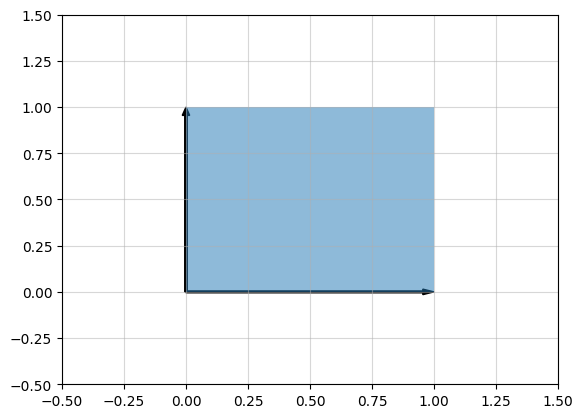

In [159]:
x0 = [0, 1]
x1 = [1, 0]

X = np.array([x0, x1])
O = np.array([0, 0])

fig, ax = plt.subplots()
ax.grid(True, alpha=.5)
ax.arrow(*O, *x0, width=0.01, color="black", length_includes_head=True)
ax.arrow(*O, *x1, width=0.01, color="black", length_includes_head=True)
ax.fill_between(x=[0, 1], y1=0, y2=1, alpha=.5)

ax.set(xlim=[-0.5, 1.5], ylim=[-0.5, 1.5])
fig.show()

適当な行列$A$で変換するとこうなる

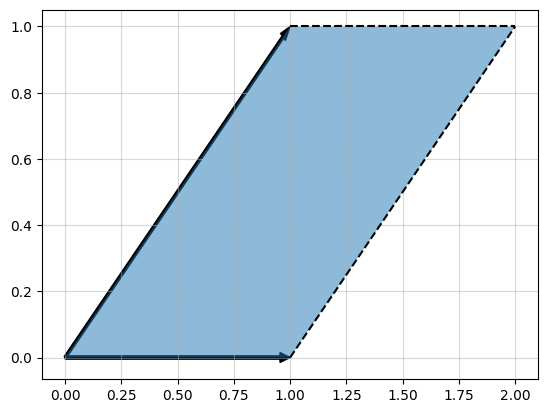

In [160]:
A = np.array([
    [1, 1],
    [0, 1]
])
x0_ = A @ x0
x1_ = A @ x1
y_ = x0_ + x1_

fig, ax = plt.subplots()
ax.grid(True, alpha=.5)
ax.arrow(0, 0, *x0_, width=0.01, color="black", length_includes_head=True)
ax.arrow(0, 0, *x1_, width=0.01, color="black", length_includes_head=True)

d = np.array([x0_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")
d = np.array([x1_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")

x = np.linspace(0, y_[0], 11)
ax.fill_between(x=x, y1=[max(e - 1, 0) for e in x], y2=[min(e, 1) for e in x], alpha=.5)
fig.show()

平行四辺形の面積は底辺×高さ。今回は底辺も高さも1なので、面積は変わっていない。

この行列$A$の行列式は1になる

In [161]:
np.linalg.det(A)

1.0

参考：[Chapter 6 行列式 | 線形代数のエッセンス - YouTube](https://www.youtube.com/watch?v=K8axNorb1CU)

## 固有値と固有ベクトル

$d$次の正方行列$A$に対して

$$
A \b{x} = \lambda \b{x}
$$

が成り立つとき、スカラー$\lambda$を$A$の**固有値**（eigenvalue）、$d$次元ベクトル$\b{x} (\neq \b{0})$を$A$の$\lambda$に対応する**固有ベクトル**（eigenvector）と呼ぶ。

上の式は

$$
(A - \lambda I) \b{x} = \b{0}
$$

と表すことができる。これが$\b{x} \neq \b{0}$であるためには

$$
\det(A - \lambda I) = 0
$$

でなければならない。この式を**固有方程式**と呼び、固有値は固有方程式の解として求める。

:::{card} 例
$$
A = \begin{pmatrix}
-3 & -2\\
4 & 3
\end{pmatrix}
$$

の場合

$$
\begin{align}
|A - \lambda I|
&=
\begin{vmatrix}
-3 - \lambda & -2 \\
4 & 3 - \lambda \\
\end{vmatrix}
\\
&= (-3 \lambda)(3 - \lambda) + 4 \times 2\\
&= -9 + 3\lambda - 3\lambda + \lambda^2 + 8\\
&= \lambda^2 - 1\\
&= (\lambda - 1)(\lambda + 1)\\
&= 0
\end{align}
$$

より、$\lambda = 1, -1$が求まる。（それぞれ$\lambda_1, \lambda_2$とおくことにする）

$\lambda_1 = 1$に対応する固有ベクトルを$\b{x}=(x_1,x_2)^\top$とおいて次のように求める

$$
A \b{x} = \lambda_1 \b{x}
\iff
\begin{align}
-3 x_1 - 2 x_2 &= x_1\\
4 x_1 + 3 x_2 &= x_2\\
\end{align}
$$

より$-2 x_1 = x_2$という関係性になるので、変数$s$を使って次のように表す。

$$
\b{x} = \begin{pmatrix}
s \\ -2 s
\end{pmatrix}
$$


同様に、$\lambda_2 = -1$に対応する固有ベクトルを$\b{y}=(y_1, y_2)^\top$とおいて次のように求める

$$
A \b{x} = \lambda_2 \b{y}
\iff
\begin{align}
-3 y_1 - 2 y_2 &= -y_1\\
4 y_1 + 3 y_2 &= -y_2\\
\end{align}
$$

より$y_1 = -y_2$という関係性なので、変数$t$を使って

$$
\b{y} = \begin{pmatrix}
t \\ -t
\end{pmatrix}
$$

となる。

$s$や$t$は任意の値でよいので、固有ベクトルの長さが1になるように定めると、固有ベクトルは

$$
\b{x} = \begin{pmatrix} 1/\sqrt{5} \\ -2/\sqrt{5} \end{pmatrix}
  \simeq \begin{pmatrix} 0.447 \\ -0.894 \end{pmatrix}
, \hspace{2em}
\b{y} = \begin{pmatrix} 1/\sqrt{2} \\ -1/\sqrt{2} \end{pmatrix}
  \simeq \begin{pmatrix} 0.707 \\ -0.707 \end{pmatrix}
$$

となる。
:::

In [19]:
import numpy as np

A = np.array([
    [-3, -2],
    [4, 3],
])

lambdas, vectors = np.linalg.eig(A)
print(f"""
λ={lambdas}
x={vectors[:, 1].round(3)}
y={vectors[:, 0].round(3)}
""")


λ=[-1.  1.]
x=[ 0.447 -0.894]
y=[-0.707  0.707]



## 参考

- [線形代数基礎](http://www.phys.shimane-u.ac.jp/tanaka_lab/lecture/linear_algebra/linear_algebra.pdf)